In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="PhVVwcqH1vFomCmpRrmE")
project = rf.workspace("deploy-c5vdb").project("classificaton")
dataset = project.version(1).download("yolov8")


/content/datasets


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=30 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:01<00:00, 18.2MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data={dataset.location}/data.yaml, epochs=30, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=

In [ ]:
!ls {HOME}/runs/detect/train/

weights


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Telebot connection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install telebot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyTelegramBotAPI: filename=pyTelegramBotAPI-4.12.0-py3-none-any.whl size=213954 sha256=67ef9f30733e2fda5fccd3837cb064a978aac00df8edeea87d7170cfb035f906
  Stored in directory: /root/.cache/pip/wheels/7e/ba/82/f3ab5bc48525778633bccc741c0424677ed3435736221819f4
Successfully built pyTelegramBotAPI


In [ ]:
from telebot import TeleBot

import telebot
import requests
from PIL import Image
import io
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install ultralytics==8.0.20

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.7/214.7 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.4 MB/s eta 0:00:00


Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


<class 'ultralytics.yolo.engine.results.Boxes'>
71.25381827354431


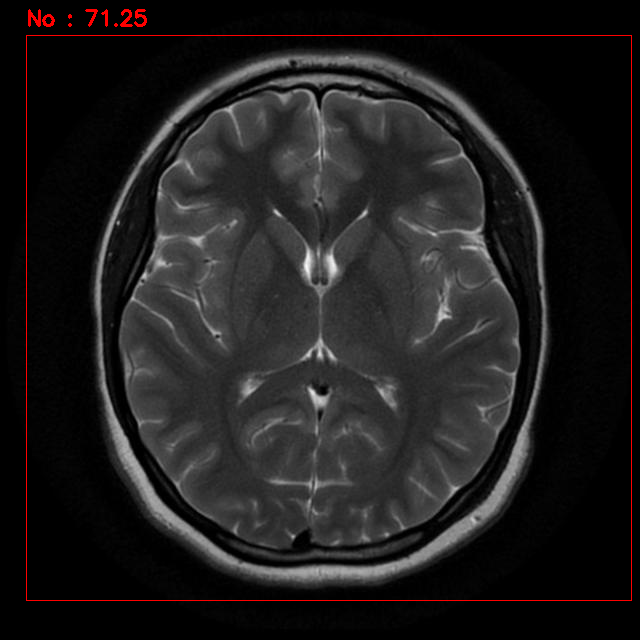

True

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



# Pip install method (recommended)



from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()



from ultralytics import YOLO

from IPython.display import display, Image




from ultralytics.yolo.engine.model import YOLO

model = YOLO("/content/drive/MyDrive/best.pt")
results = model.predict("/content/res/n1.jpg")




result = results[0]
box = result.boxes




import numpy
# a = box.xyxy
print(type(box))
pred_boxes = box.xyxy
pred_labels = box.cls
pred_scores = box.conf




from random import randint
import cv2
from google.colab.patches import cv2_imshow

img1 = cv2.imread('/content/res/n1.jpg')
# Display the image and the predicted boxes
l = [ (255,0,0), (0, 255 , 0), ( 0 , 0, 255)]
# ax = plt.gca()
for i in range(len(pred_boxes)):
  # Only display boxes with confidence > 0.5
  box = pred_boxes[i].tolist()
  label = pred_labels[i].item()
  score = pred_scores[i].item()
  color = np.random.rand(3)
  c = randint(0, 2)
  font = cv2.FONT_HERSHEY_SIMPLEX
  score = score * 100
  label= "Yes" if label == 1 else "No"
  s = str(label) + " : " + "{:.2f}".format(score)

  # print(box)
  b1, b2, b3, b4 = int(box[0]), int(box[1]), int(box[2]), int(box[3]),
  # print(c)
  # print(l[c])
  cv2.rectangle( img1 , ( b1, b2+35 ), ( b3 , b4), (0,0,255), 1)

  cv2.putText(img1, s , (b1 , b2+25), font, 0.7, (0,0,255) , 2)
  # plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], fill=False, edgecolor=color, linewidth=1)

  print(score)
  # ax.text(box[0], box[1], f'{label}: {score: .2f}', color=color, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
cv2_imshow(img1)
cv2.imwrite('/content/res/predict.jpg', img1)
# plt.axis("off")

# plt.savefig('/content/res/predict.jpg')



Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


42.47155487537384
32.84124732017517


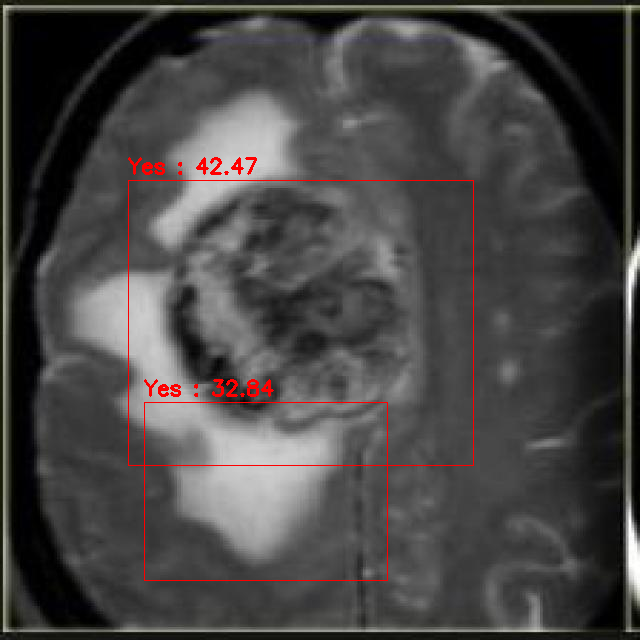

80.31316995620728


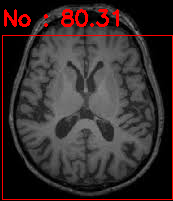

77.86104679107666


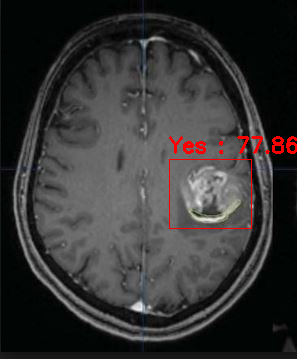

In [ ]:
import telebot
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
# Initialize the Telegram bot
bot = telebot.TeleBot("6299508922:AAEbX8j3yTGpfVS9Gtx1Tg29YvPatRA5jZo")
model = YOLO("/content/drive/MyDrive/best.pt")
# Load the Keras model
# model = load_model('covid.h5')



@bot.message_handler(commands=['start', 'help'])
def handle_start_help(message):
    bot.reply_to(message, "Hello! Send me an image, and I will process it.")

@bot.message_handler(content_types=['photo'])
def handle_image(message):
    # Check if the message contains a photo
    if message.photo:
        # Get the file_id of the photo
        file_id = message.photo[-1].file_id

        # Get the file object and download the image
        file_info = bot.get_file(file_id)
        downloaded_file = bot.download_file(file_info.file_path)

        # Save the image locally
        image_path = '/content/res/image.jpg'
        with open(image_path, 'wb') as f:
            f.write(downloaded_file)

        image = Image.open(image_path)


        results = model.predict("/content/res/image.jpg")

        result = results[0]
        box = result.boxes
        pred_boxes = box.xyxy
        pred_labels = box.cls
        pred_scores = box.conf


        img1 = cv2.imread('/content/res/image.jpg')
        # Display the image and the predicted boxes
        l = [ (255,0,0), (0, 255 , 0), ( 0 , 0, 255)]
        # ax = plt.gca()
        for i in range(len(pred_boxes)):
          # Only display boxes with confidence > 0.5
          box = pred_boxes[i].tolist()
          label = pred_labels[i].item()
          score = pred_scores[i].item()
          color = np.random.rand(3)
          c = randint(0, 2)
          font = cv2.FONT_HERSHEY_SIMPLEX
          score = score * 100
          label= "Yes" if label == 1 else "No"
          s = label + " : " + "{:.2f}".format(score)
          # print(box)
          b1, b2, b3, b4 = int(box[0]), int(box[1]), int(box[2]), int(box[3]),
          # print(c)
          # print(l[c])
          if label == "No":
            cv2.rectangle( img1 , ( b1, b2+35 ), ( b3 , b4), (0,0,255), 1)
            cv2.putText(img1, s , (b1 , b2+25), font, 0.7, (0,0,255) , 2)
          else:
            cv2.rectangle( img1 , ( b1, b2 ), ( b3 , b4), (0,0,255), 1)
            cv2.putText(img1, s , (b1 , b2-7), font, 0.7, (0,0,255) , 2)
          # plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], fill=False, edgecolor=color, linewidth=1)

          print(score)
          # ax.text(box[0], box[1], f'{label}: {score: .2f}', color=color, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
        cv2_imshow(img1)
        cv2.imwrite('/content/res/predict.jpg', img1)
        img1 = Image.open('/content/res/predict.jpg')
        bot.send_photo(message.chat.id, img1)
    else:
        # If no photo is sent, reply to the user
        bot.reply_to(message, "Please send me an image.")

bot.polling()